## <center> <font color = magenta> In-Class Project : Cars Sale Price Prediction

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from word2number import w2n
from tqdm import tqdm

In [2]:
cars = pd.read_csv("CarPrice_Data.csv")

In [3]:
cars.head(2)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [4]:
cars.tail()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
cars.shape


(205, 26)

In [6]:
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          194 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           200 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    193 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
cars.columns


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
list(cars.columns)


['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [9]:
for x in cars.columns:
    print(x)


car_ID
symboling
CarName
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
wheelbase
carlength
carwidth
carheight
curbweight
enginetype
cylindernumber
enginesize
fuelsystem
boreratio
stroke
compressionratio
horsepower
peakrpm
citympg
highwaympg
price


In [10]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [11]:
cars.describe(include='object').T


,count,unique,top,freq
CarName,205,147,toyota corona,6
fueltype,194,2,gas,174
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,200,5,sedan,91
drivewheel,205,3,fwd,120
enginelocation,193,2,front,190
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


In [12]:
list(cars.columns[cars.dtypes == 'int64'])


['car_ID',
 'symboling',
 'curbweight',
 'enginesize',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [13]:
cars.iloc[0:5, 0:4]


,car_ID,symboling,CarName,fueltype
0,1,3,alfa-romero giulia,gas
1,2,3,alfa-romero stelvio,gas
2,3,1,alfa-romero Quadrifoglio,gas
3,4,2,audi 100 ls,gas
4,5,2,audi 100ls,gas


In [14]:
cars.loc[0:5,['CarName','fueltype']]


,CarName,fueltype
0,alfa-romero giulia,gas
1,alfa-romero stelvio,gas
2,alfa-romero Quadrifoglio,gas
3,audi 100 ls,gas
4,audi 100ls,gas
5,audi fox,gas


In [15]:
cars['fueltype'].unique()


array(['gas', nan, 'diesel'], dtype=object)

In [16]:
cars['fueltype'].dtype


dtype('O')

In [17]:
cars['fueltype'].value_counts()


gas       174
diesel     20
Name: fueltype, dtype: int64

In [18]:
cars.isnull().sum()


car_ID               0
symboling            0
CarName              0
fueltype            11
aspiration           0
doornumber           0
carbody              5
drivewheel           0
enginelocation      12
wheelbase            0
carlength            0
carwidth             0
carheight            0
curbweight           0
enginetype           0
cylindernumber       0
enginesize           0
fuelsystem           0
boreratio            0
stroke               0
compressionratio     0
horsepower           0
peakrpm              0
citympg              0
highwaympg           0
price                0
dtype: int64

In [19]:
cars.isnull().any()


car_ID              False
symboling           False
CarName             False
fueltype             True
aspiration          False
doornumber          False
carbody              True
drivewheel          False
enginelocation       True
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [20]:
cars_copy = cars.copy()


In [21]:
null_columns=cars.columns[cars.isnull().any()]
cars[null_columns].isnull().sum()*100/len(cars)


fueltype          5.365854
carbody           2.439024
enginelocation    5.853659
dtype: float64

In [22]:
list(null_columns)


['fueltype', 'carbody', 'enginelocation']

In [23]:
for x in cars.columns[cars.isnull().any()]:
    print('--------------------------------')
    print('Column Name:',x)
    print(cars[x].value_counts()*100/len(cars))
    print(cars[x].value_counts())
    print('--------------------------------')

--------------------------------
Column Name: fueltype
gas       84.878049
diesel     9.756098
Name: fueltype, dtype: float64
gas       174
diesel     20
Name: fueltype, dtype: int64
--------------------------------
--------------------------------
Column Name: carbody
sedan          44.390244
hatchback      34.146341
wagon          12.195122
hardtop         3.902439
convertible     2.926829
Name: carbody, dtype: float64
sedan          91
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
--------------------------------
--------------------------------
Column Name: enginelocation
front    92.682927
rear      1.463415
Name: enginelocation, dtype: float64
front    190
rear       3
Name: enginelocation, dtype: int64
--------------------------------


In [24]:
cars['fueltype'].fillna (value='gas', inplace = True)
cars['enginelocation'].fillna (value='front', inplace = True)

In [25]:
cars['fueltype'].unique()


array(['gas', 'diesel'], dtype=object)

In [26]:
cars['enginelocation'].unique()


array(['front', 'rear'], dtype=object)

In [27]:
for x in cars.columns:
    print('--------------------------------')
    print('Column Name:',x)
    print('--------------------------------')
    print(cars[x].value_counts()*100/len(cars))
    print(cars[x].value_counts())

--------------------------------
Column Name: car_ID
--------------------------------
1      0.487805
142    0.487805
132    0.487805
133    0.487805
134    0.487805
         ...   
72     0.487805
73     0.487805
74     0.487805
75     0.487805
205    0.487805
Name: car_ID, Length: 205, dtype: float64
1      1
142    1
132    1
133    1
134    1
      ..
72     1
73     1
74     1
75     1
205    1
Name: car_ID, Length: 205, dtype: int64
--------------------------------
Column Name: symboling
--------------------------------
 0    32.682927
 1    26.341463
 2    15.609756
 3    13.170732
-1    10.731707
-2     1.463415
Name: symboling, dtype: float64
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
--------------------------------
Column Name: CarName
--------------------------------
toyota corona           2.926829
toyota corolla          2.926829
peugeot 504             2.926829
subaru dl               1.951220
mitsubishi mirage g4    1.463415
    

In [28]:
cars.loc[cars['carbody'].isnull()]


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
3,4,2,audi 100 ls,gas,std,four,NaN,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,NaN,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
13,14,0,bmw x3,gas,std,four,NaN,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105.0
14,15,1,bmw z4,gas,std,four,NaN,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565.0
41,42,0,honda civic,gas,std,four,NaN,fwd,front,96.5,...,110,mpfi,3.15,3.58,9.0,101,5800,24,28,12945.0


In [29]:
cars['carbody'] = np.where(
   (cars['CarName'] =='audi 100 ls') & (cars['carbody'].isnull()) , 'sedan', cars['carbody'])

In [30]:
cars['carbody'] = np.where(
   (cars['CarName'] =='audi 100ls') & (cars['carbody'].isnull()) , 'sedan', cars['carbody'])

In [31]:
cars['carbody'].fillna (value='sedan', inplace = True)


In [32]:
pd.set_option('display.max_rows',20000, 'display.max_columns',100)


In [33]:
cars['CarName'].value_counts().sort_index(ascending=True)


Nissan versa                       1
alfa-romero Quadrifoglio           1
alfa-romero giulia                 1
alfa-romero stelvio                1
audi 100 ls                        1
audi 100ls                         2
audi 4000                          1
audi 5000                          1
audi 5000s (diesel)                1
audi fox                           1
bmw 320i                           2
bmw x1                             1
bmw x3                             2
bmw x4                             1
bmw x5                             1
bmw z4                             1
buick century                      1
buick century luxus (sw)           1
buick century special              1
buick electra 225 custom           1
buick opel isuzu deluxe            1
buick regal sport coupe (turbo)    1
buick skyhawk                      1
buick skylark                      1
chevrolet impala                   1
chevrolet monte carlo              1
chevrolet vega 2300                1
d

In [34]:
cars['CarName'].unique()


array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [35]:
cars["CarName"] = np.where(cars["CarName"] == "vw dasher", "volkswagen dasher", cars["CarName"])
cars["CarName"] = np.where(cars["CarName"] == "vw rabbit", "volkswagen rabbit", cars["CarName"])
cars["CarName"] = np.where(cars["CarName"] == "vokswagen rabbit", "volkswagen rabbit", cars["CarName"])

cars["CarName"] = np.where(cars["CarName"] == "toyouta tercel", "toyota tercel", cars["CarName"])
cars["CarName"] = np.where(cars["CarName"] == "toyota corona", "toyota corolla", cars["CarName"])

cars["CarName"] = np.where(cars["CarName"] == "toyota corona hardtop", "toyota corolla hardtop", cars["CarName"])
cars["CarName"] = np.where(cars["CarName"] == "toyota corona liftback", "toyota corolla liftback", cars["CarName"])
cars["CarName"] = np.where(cars["CarName"] == "toyota corona mark ii", "toyota corolla mark ii", cars["CarName"])
cars["CarName"] = np.where(cars["CarName"] == "maxda glc deluxe", "mazda glc deluxe", cars["CarName"])
cars["CarName"] = np.where(cars["CarName"] == "maxda rx3", "mazda rx3", cars["CarName"])

cars["CarName"] = np.where(cars["CarName"] == "audi 100 ls", "audi 100ls", cars["CarName"])
cars["CarName"] = np.where(cars["CarName"] == "porcshce panamera", "porsche panamera", cars["CarName"])

In [36]:
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])

cars.insert(3,"CompanyName",CompanyName)

In [37]:
cars.drop(['car_ID'],axis=1,inplace=True)
cars

,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000
1,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000
2,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000
3,2,audi 100ls,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
4,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000
5,2,audi fox,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000
6,1,audi 100ls,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000
7,1,audi 5000,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000
8,1,audi 4000,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000
9,0,audi 5000s (diesel),audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167


In [38]:
cars['CompanyName'].value_counts()


toyota         32
mazda          17
nissan         17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Nissan          1
Name: CompanyName, dtype: int64

In [39]:
cars = cars.replace(to_replace ="maxda", value ="mazda") 


## <center> Visualizations

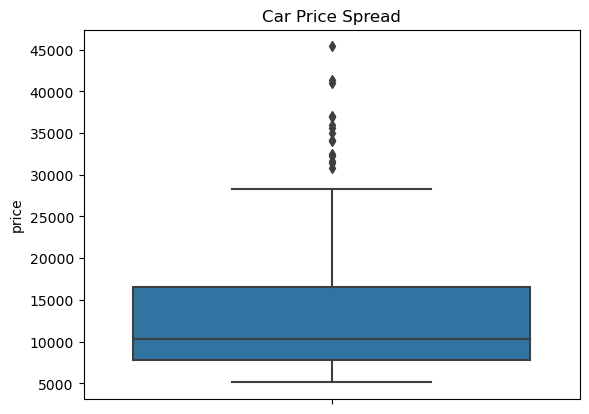

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [40]:
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)
plt.show()
print(cars.price.describe())

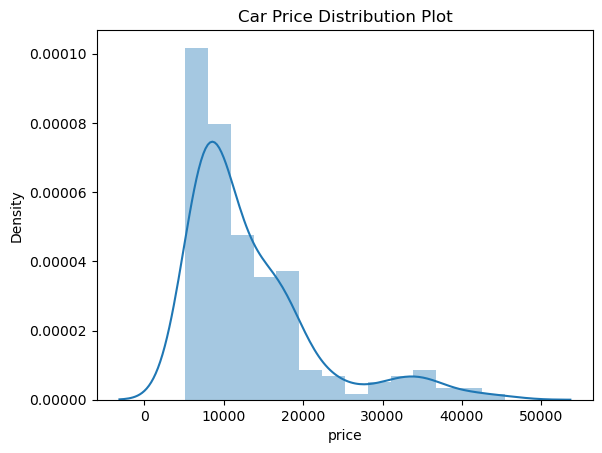

In [41]:
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)
plt.show()

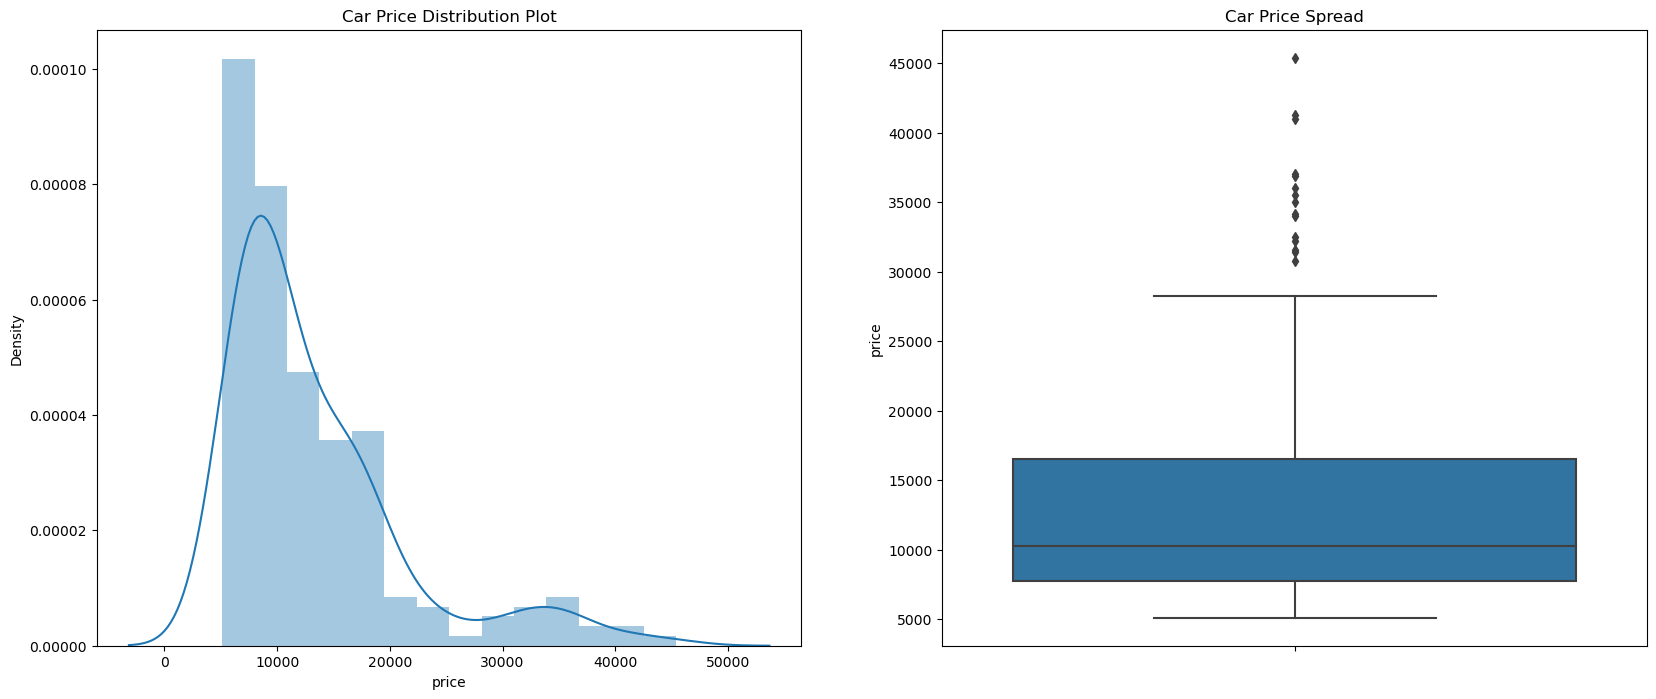

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [42]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()
print(cars.price.describe())

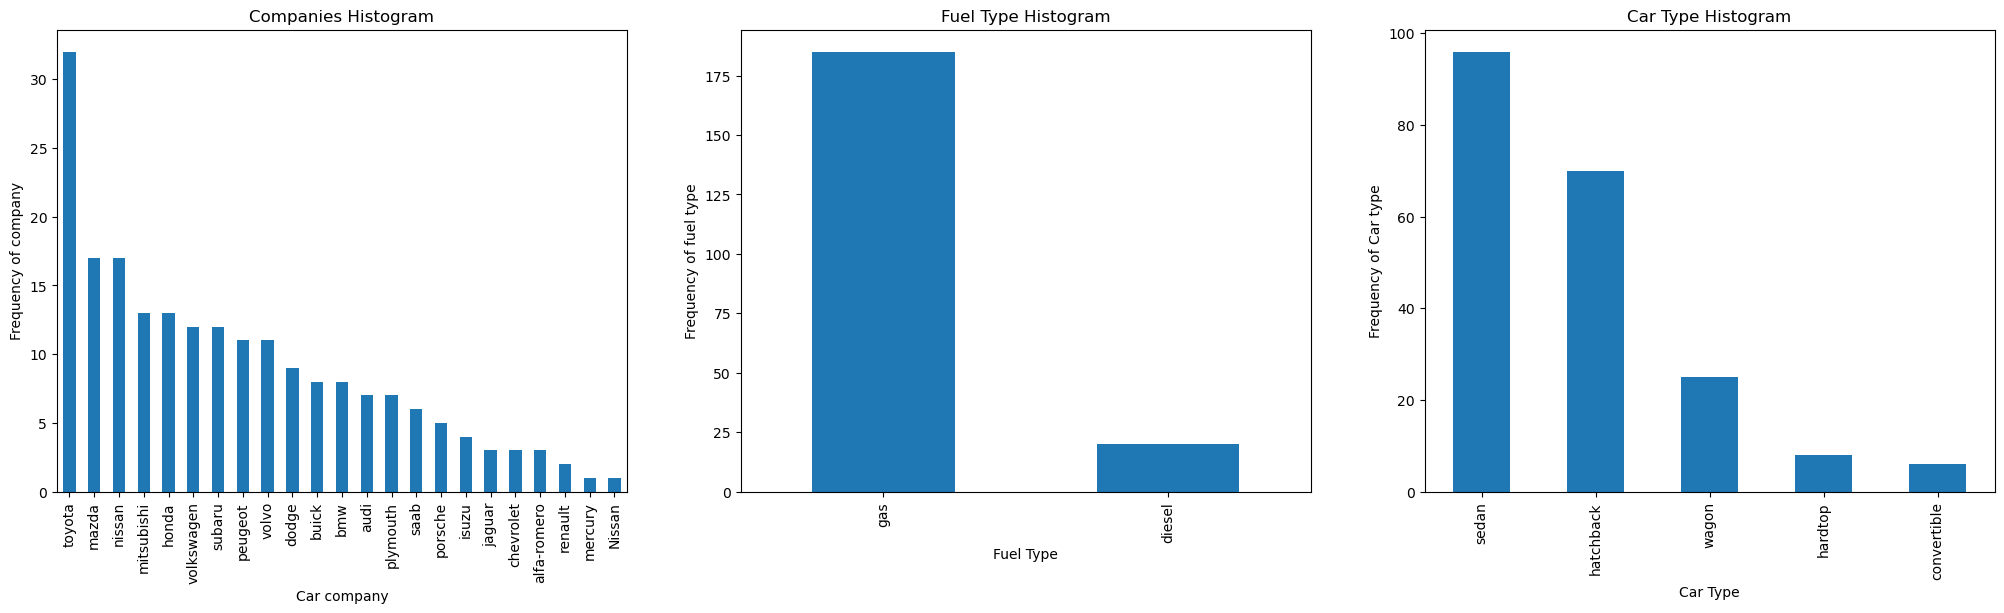

In [43]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind = 'bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind ='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind ='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

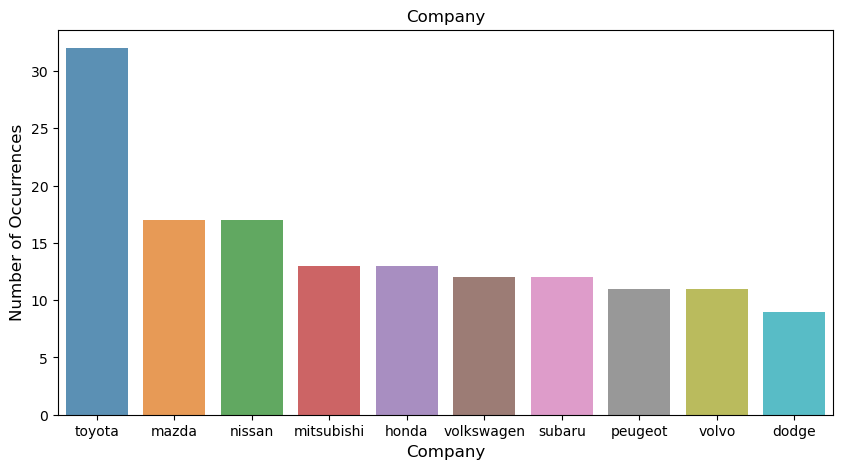

In [44]:
company  = cars['CompanyName'].value_counts()
company = company[:10,]
plt.figure(figsize=(10,5))
sns.barplot(company.index, company.values, alpha=0.8)
plt.title('Company')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Company', fontsize=12)
plt.show()

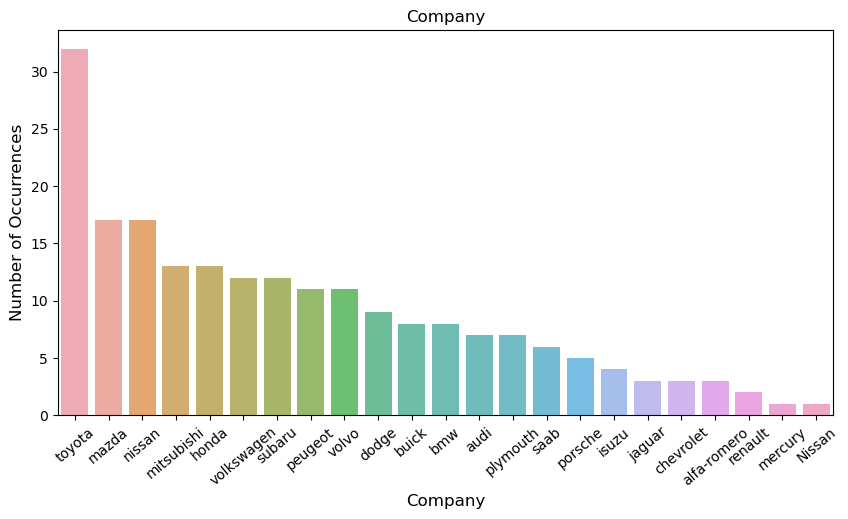

In [45]:
company  = cars['CompanyName'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(company.index, company.values, alpha=0.8)
plt.title('Company')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Company', fontsize=12)
plt.xticks(rotation = 40)
plt.show()

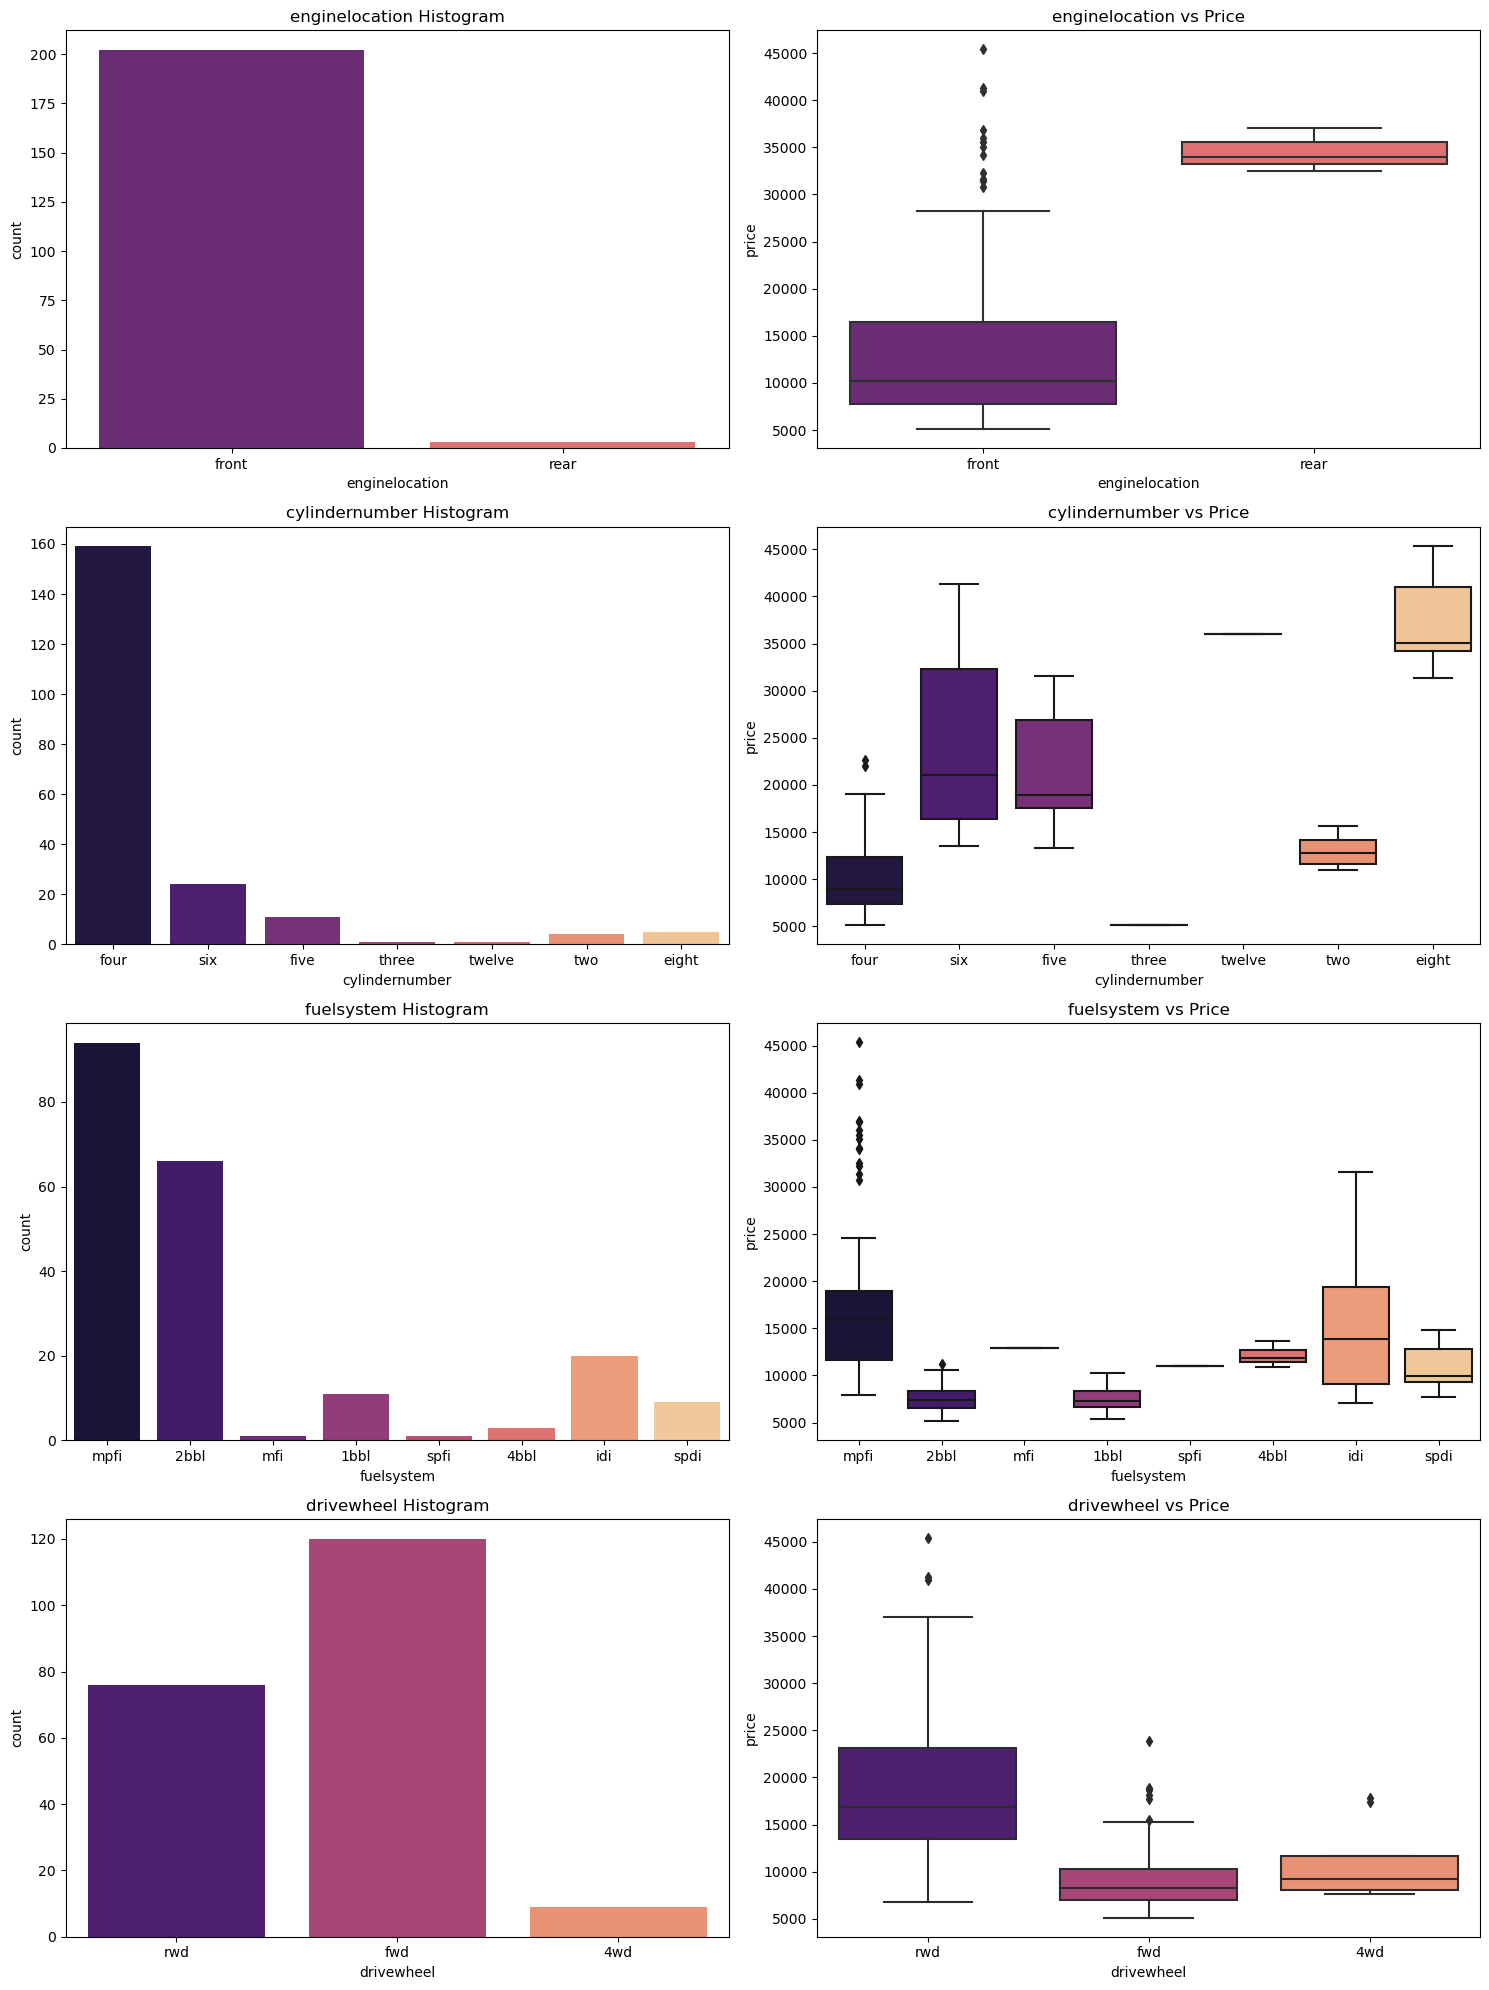

In [46]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

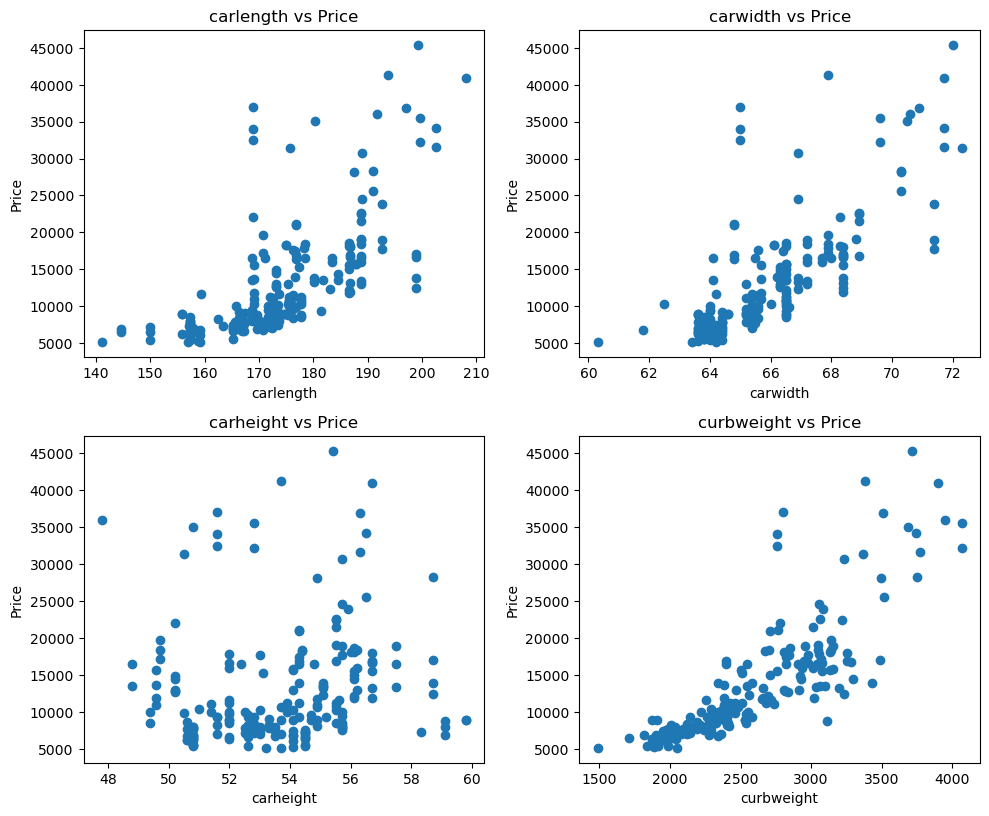

In [47]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

In [107]:
#Binning the Car Companies based on avg prices of each Company.
cars['price'] = cars['price'].astype('int')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange_binned'] = pd.cut(cars['price'],bins,right=False,labels=cars_bin)
cars.head()

,symboling,CarName,CompanyName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsrange_binned,doornumber_int,cylindernumber_int
0,3,alfa-romero giulia,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium,2,4
1,3,alfa-romero stelvio,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium,2,4
2,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium,2,6
3,2,audi 100ls,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium,4,4
4,2,audi 100ls,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium,4,5


In [49]:
# cars_new = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
#                   'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
#                      'carlength','carwidth', 'carsrange_binned']]
# cars_new.head()
# sns.pairplot(cars_new)
# plt.show()

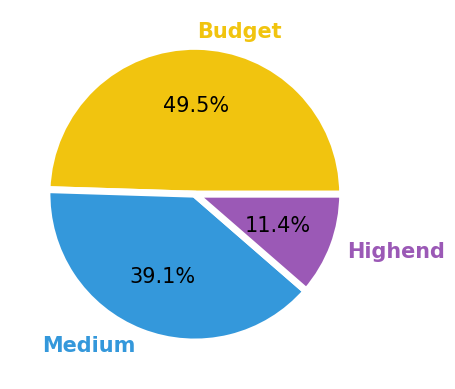

In [50]:
c = ['#F1C40F', '#3498DB',"#9b59b6"]
labels = ['Budget','Medium','Highend']

patches, texts, pcts=plt.pie(cars['carsrange_binned'].value_counts(),labels =labels,colors=c, autopct='%.1f%%' ,
         wedgeprops={'linewidth': 5.0, 'edgecolor': 'white'},textprops={'size': '15', 'color':'black'})
plt.setp(texts, fontweight=700)

for i, color in enumerate(c):
    texts[i].set_color(color)

Text(0, 0.5, 'Count')

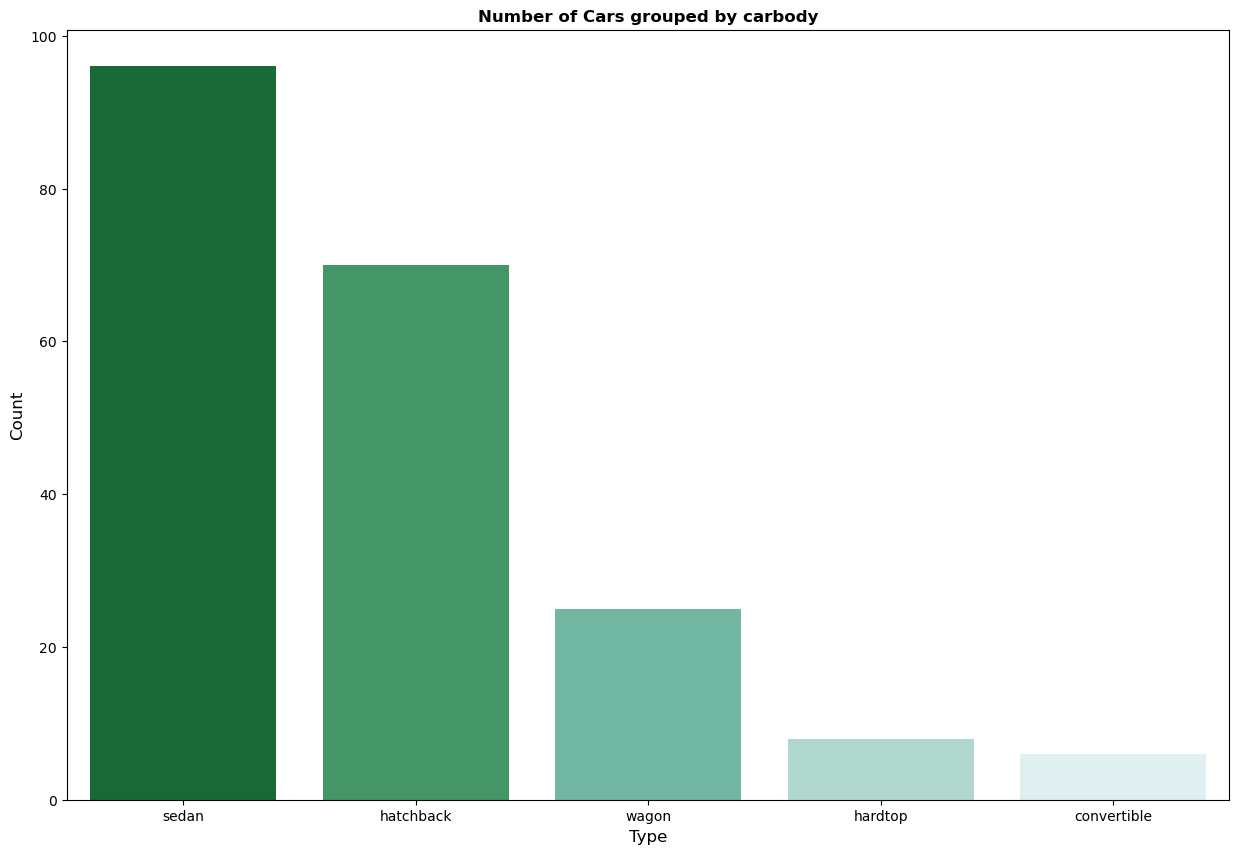

In [51]:
plt.figure(figsize=(15,10))
sns.countplot(x='carbody', data = cars,
              order=pd.value_counts(cars['carbody']).index, palette='BuGn_r')
plt.title('Number of Cars grouped by carbody', weight='bold')
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Number of Cars grouped by carbody')

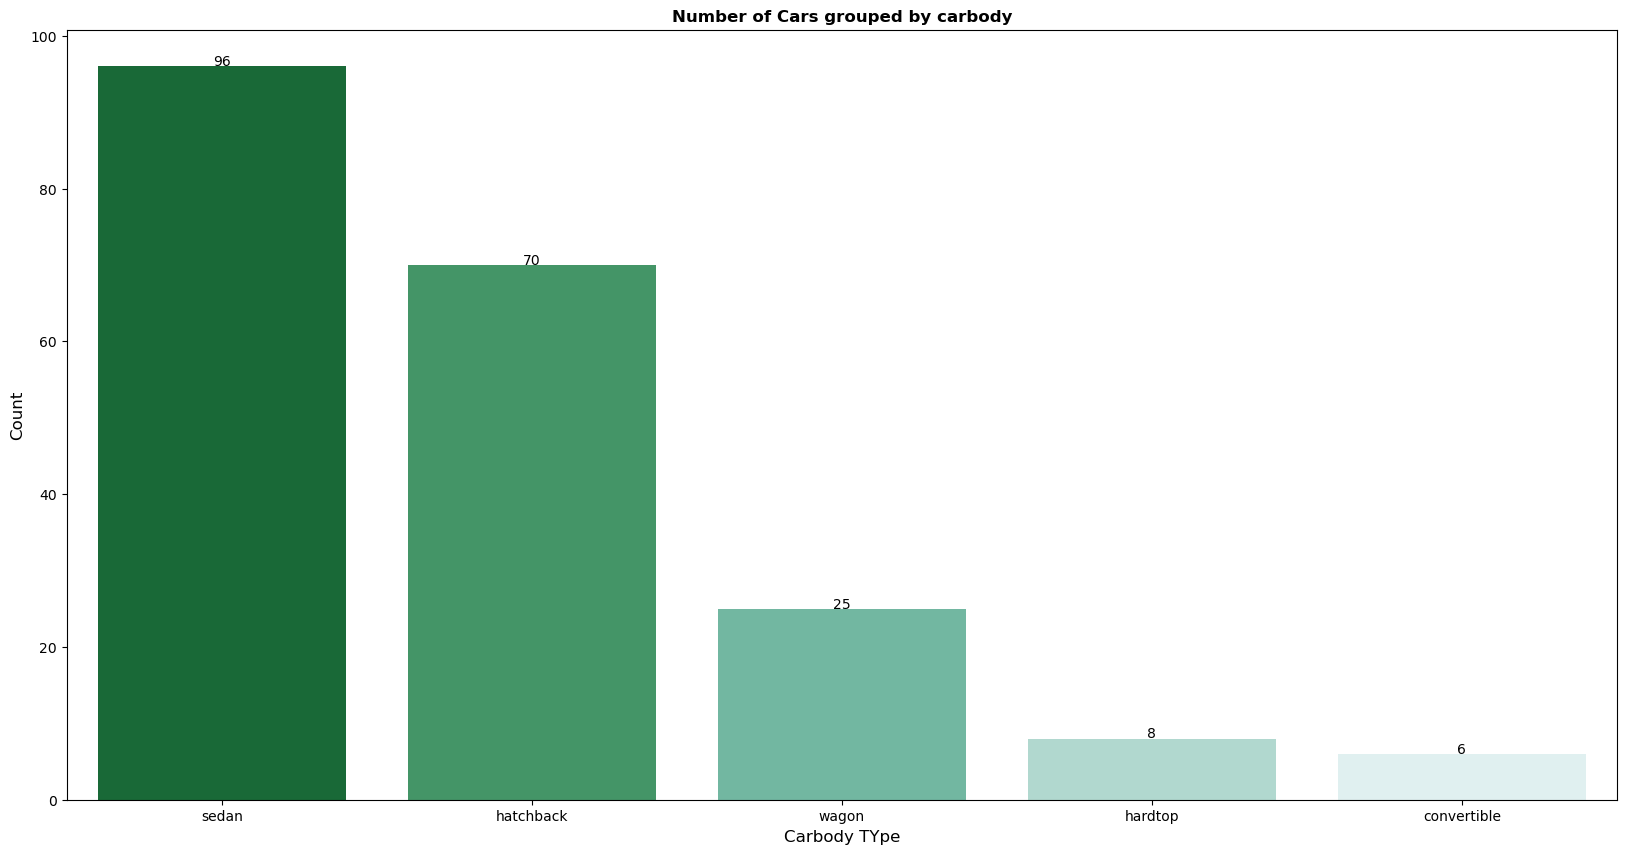

In [52]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x='carbody', data=cars, order=pd.value_counts(cars['carbody']).index, palette='BuGn_r')
graph.set_xticklabels(graph.get_xticklabels())
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        cars['carbody'].value_counts()[i],ha="center")
    i += 1

plt.xlabel('Carbody TYpe', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Cars grouped by carbody', weight='bold')

In [53]:
cars['carbody'].value_counts()


sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

Text(0, 0.5, 'citympg')

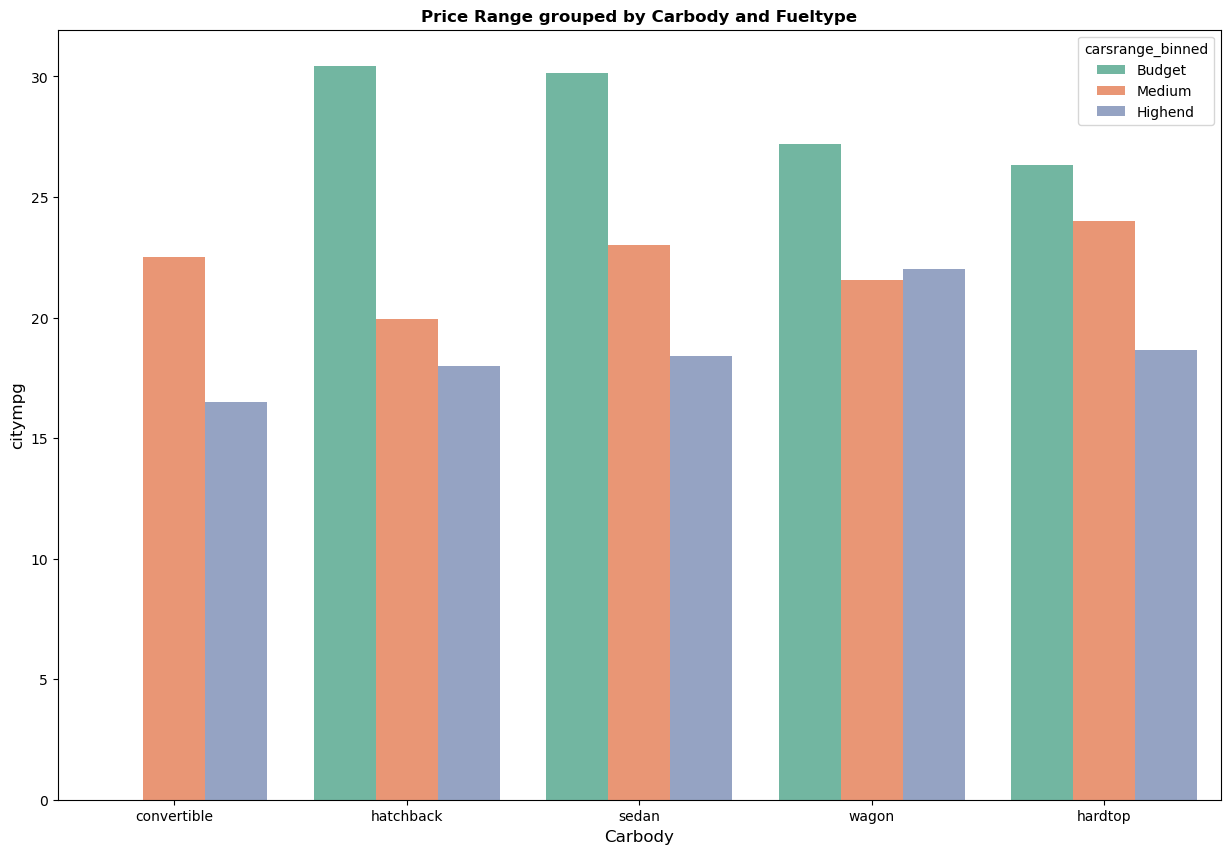

In [109]:
#df['adr'] = df['adr'].astype(float)
from numpy import mean
plt.figure(figsize=(15,10))
sns.barplot(x='carbody', y='citympg', hue='carsrange_binned', dodge=True, palette= 'Set2', data=cars,estimator=mean,ci = None)
plt.title('Price Range grouped by Carbody and Fueltype', weight='bold')
plt.xlabel('Carbody', fontsize=12)
plt.ylabel('citympg', fontsize=12)

Text(0, 0.5, 'price')

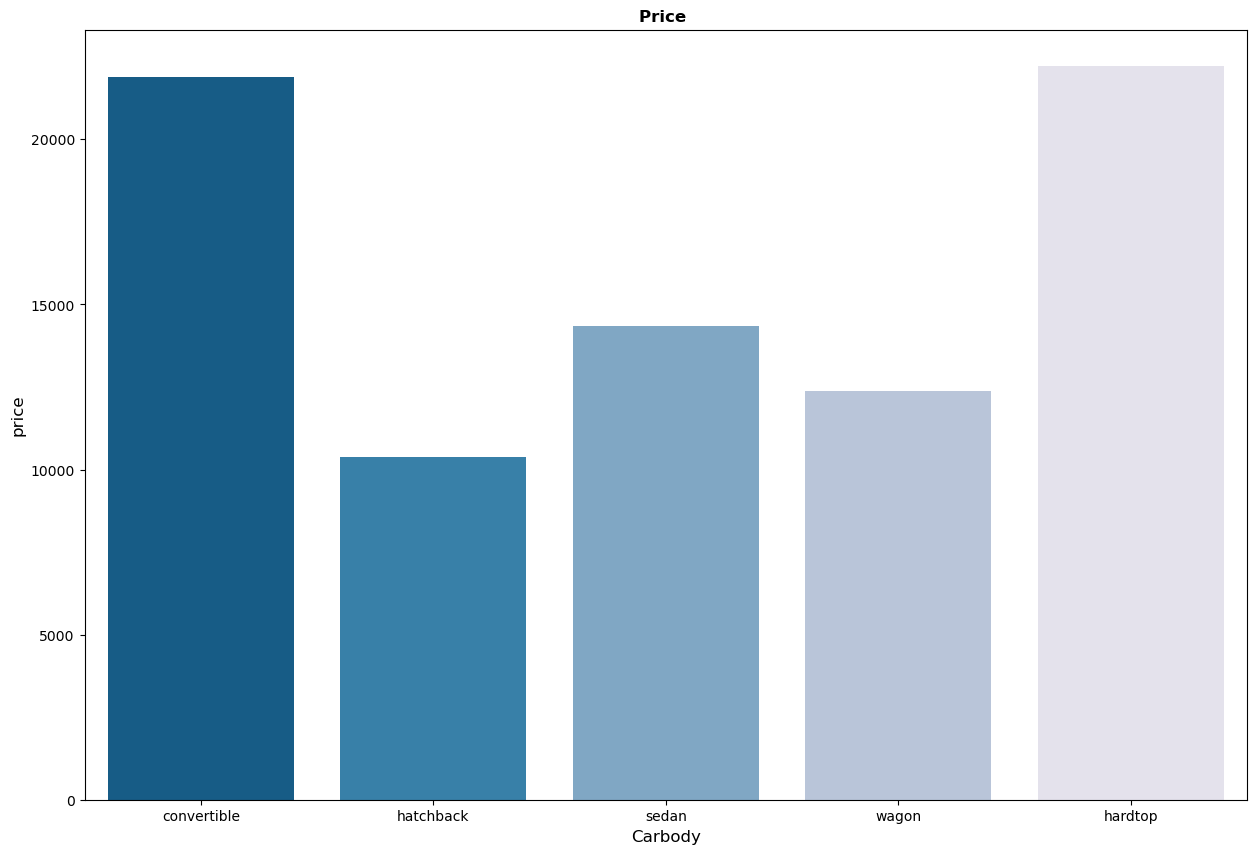

In [55]:
from numpy import mean
plt.figure(figsize=(15,10))
sns.barplot(x='carbody', y='price',  palette= 'PuBu_r', data=cars,estimator=mean,ci = None)
plt.title('Price ', weight='bold')
plt.xlabel('Carbody', fontsize=12)
plt.ylabel('price', fontsize=12)

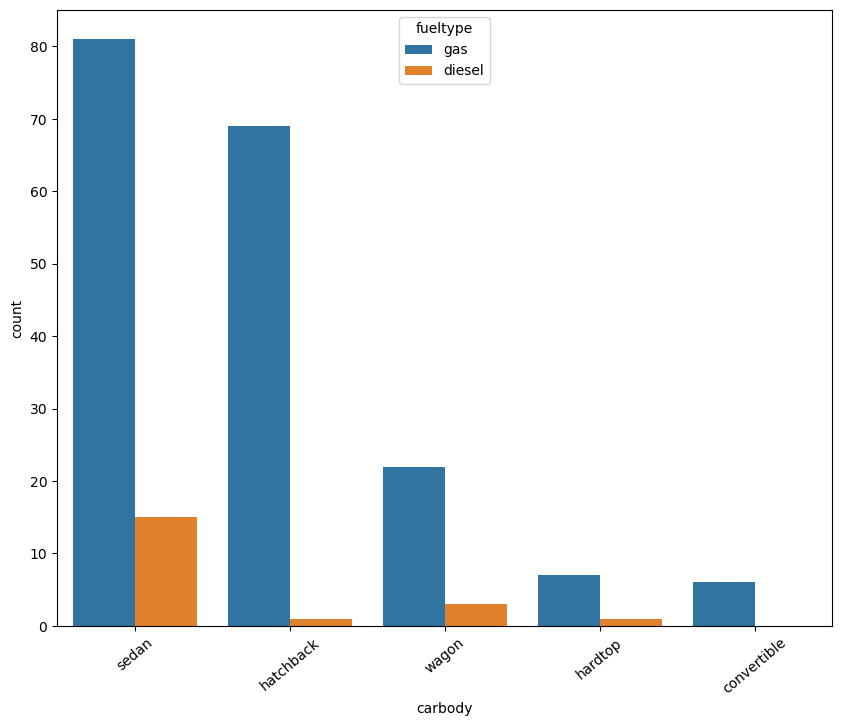

In [56]:
plt.figure(figsize=(10,8))
sns.countplot(x='carbody',order=pd.value_counts(cars['carbody']).index,hue='fueltype',data=cars)
plt.xticks(rotation = 40)
plt.show()

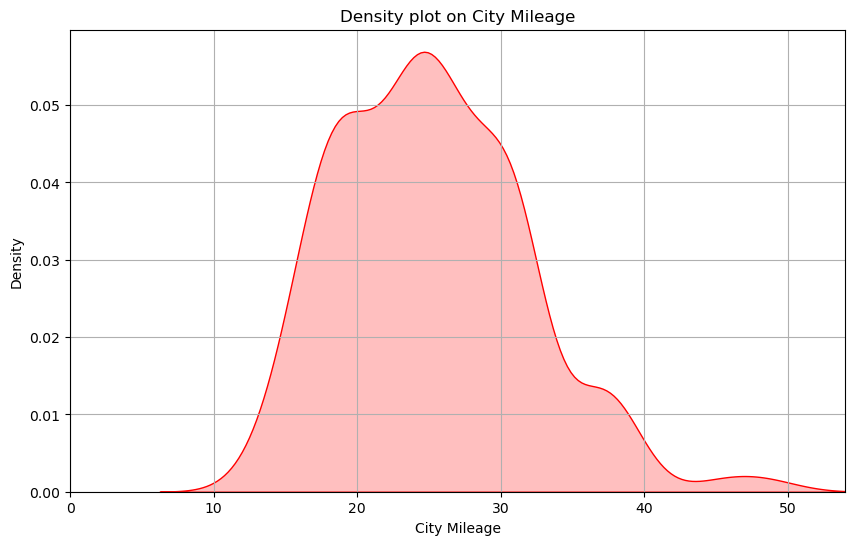

In [57]:
plt.figure(figsize=(10,6))
sns.kdeplot(cars.citympg, shade=True,color="r")
plt.xlim((0,54))
plt.title("Density plot on City Mileage")
plt.ylabel("Density")
plt.xlabel('City Mileage')
plt.grid(True)
plt.show()


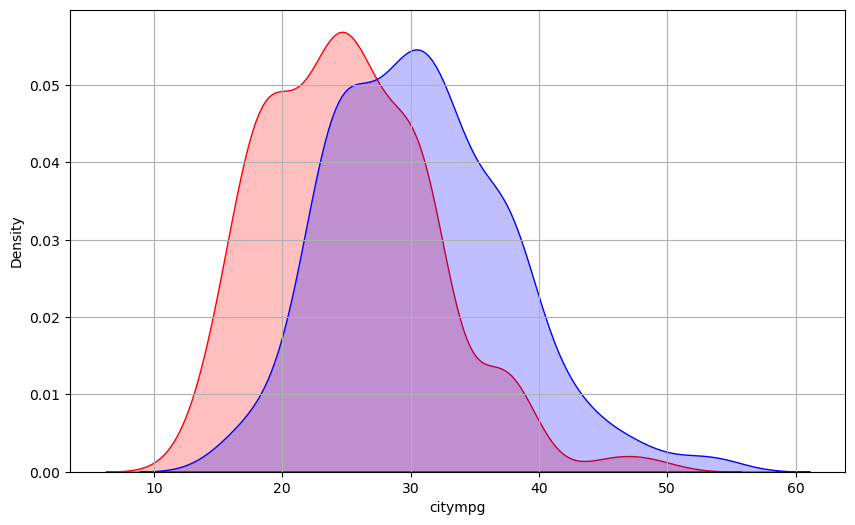

In [58]:
plt.figure(figsize=(10,6))
fig = sns.kdeplot(cars['citympg'], shade=True, color="r")
fig = sns.kdeplot(cars['highwaympg'], shade=True, color="b")
plt.grid(True)
plt.show()

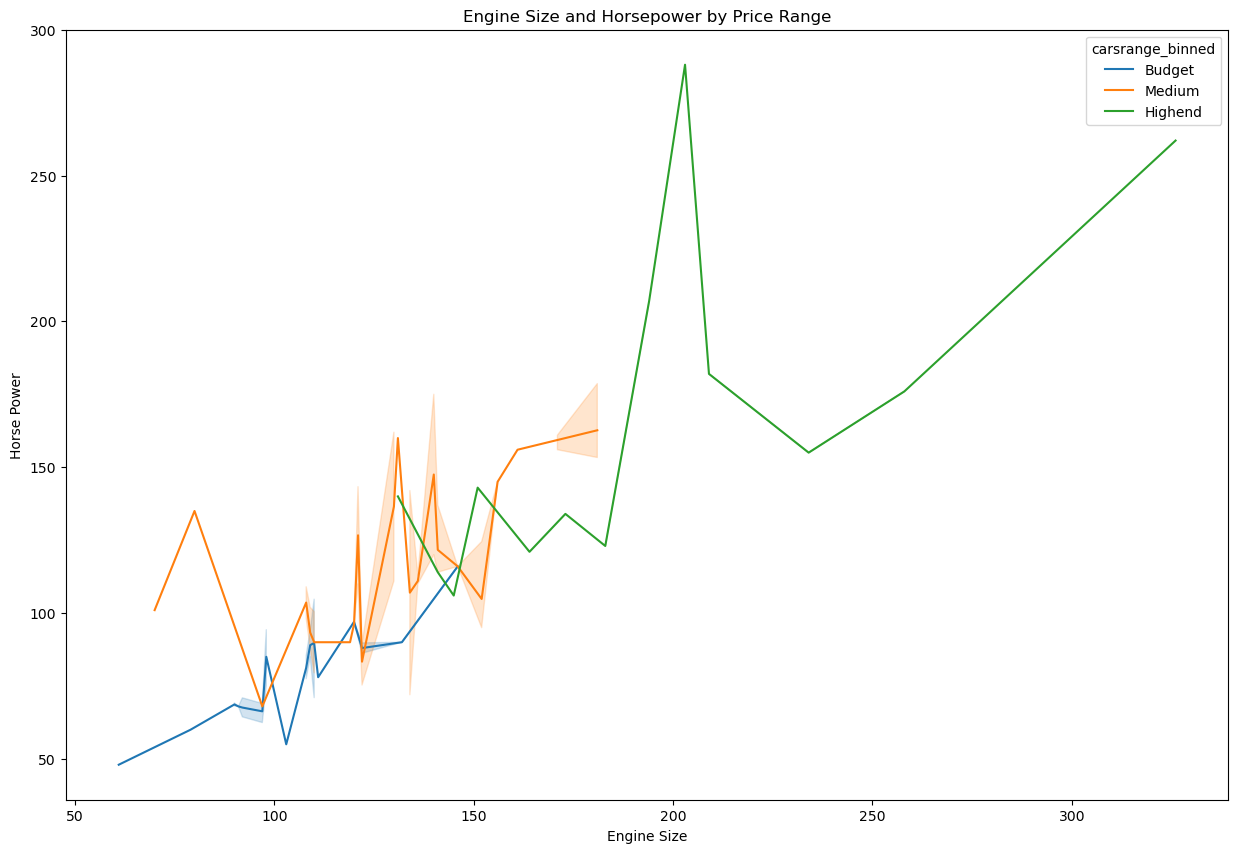

In [59]:
plt.figure(figsize=(15,10))
sns.lineplot(data = cars, x = 'enginesize', y = 'horsepower', hue = 'carsrange_binned')
plt.title("Engine Size and Horsepower by Price Range")
plt.ylabel("Horse Power")
plt.xlabel('Engine Size')
plt.show()

Text(0, 0.5, 'Frequency')

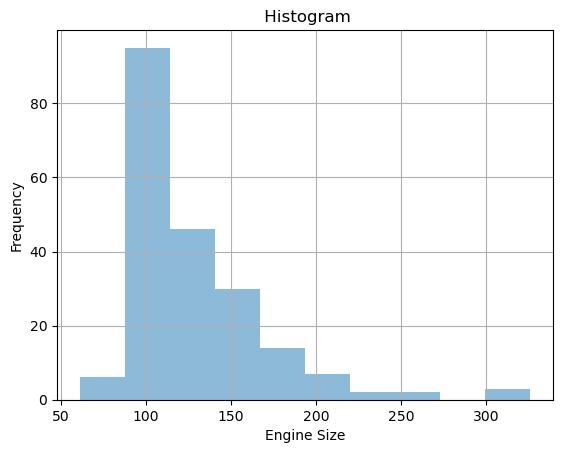

In [60]:
cars.enginesize.hist(bins=10, alpha=0.5)
plt.title(" Histogram")
plt.xlabel("Engine Size")
plt.ylabel("Frequency")

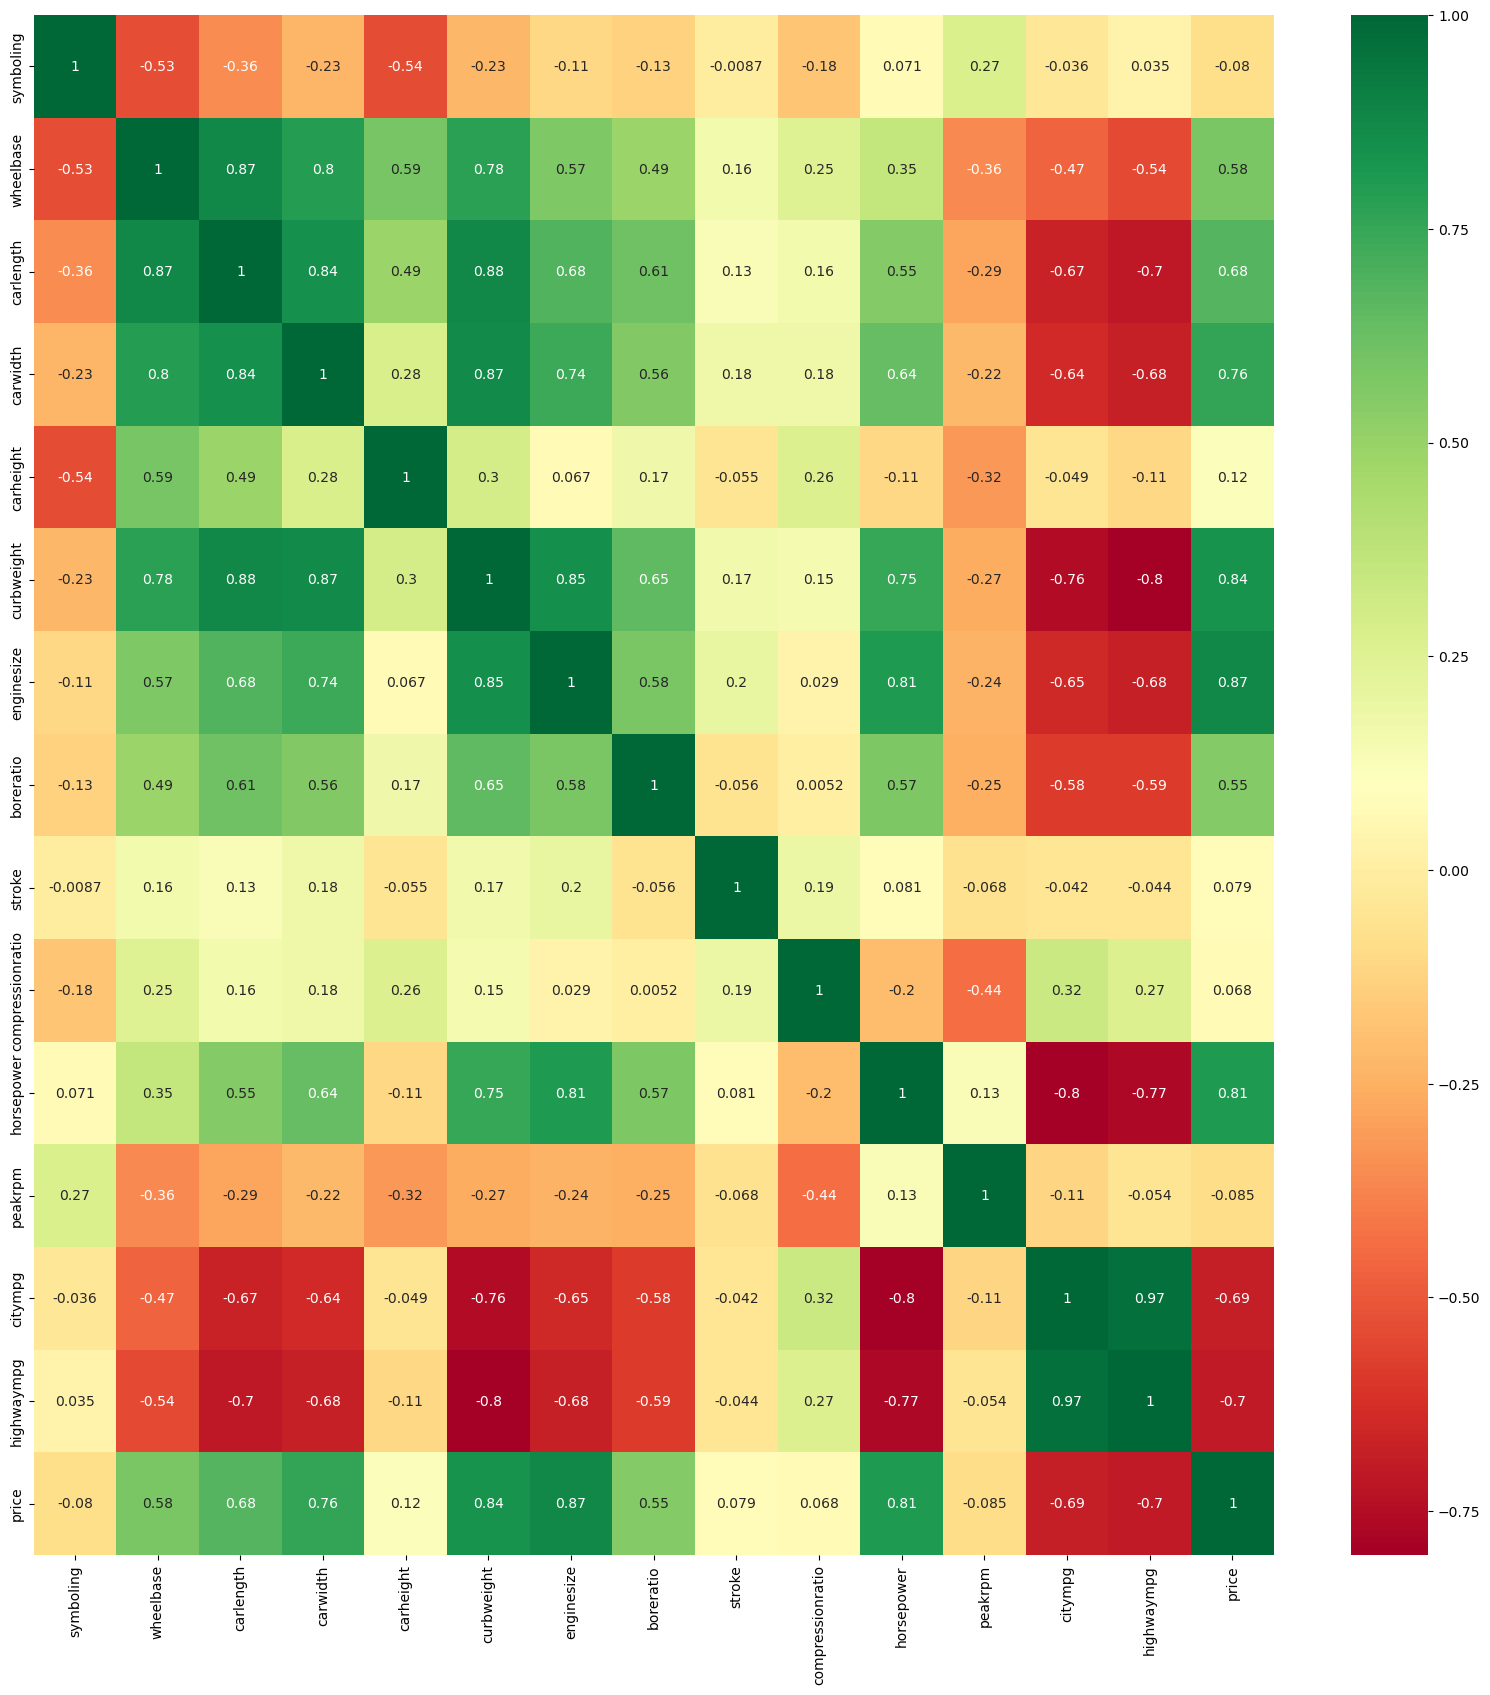

In [61]:
corrmat=cars.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(cars[top_corr_feature].corr(), annot=True,cmap="RdYlGn")

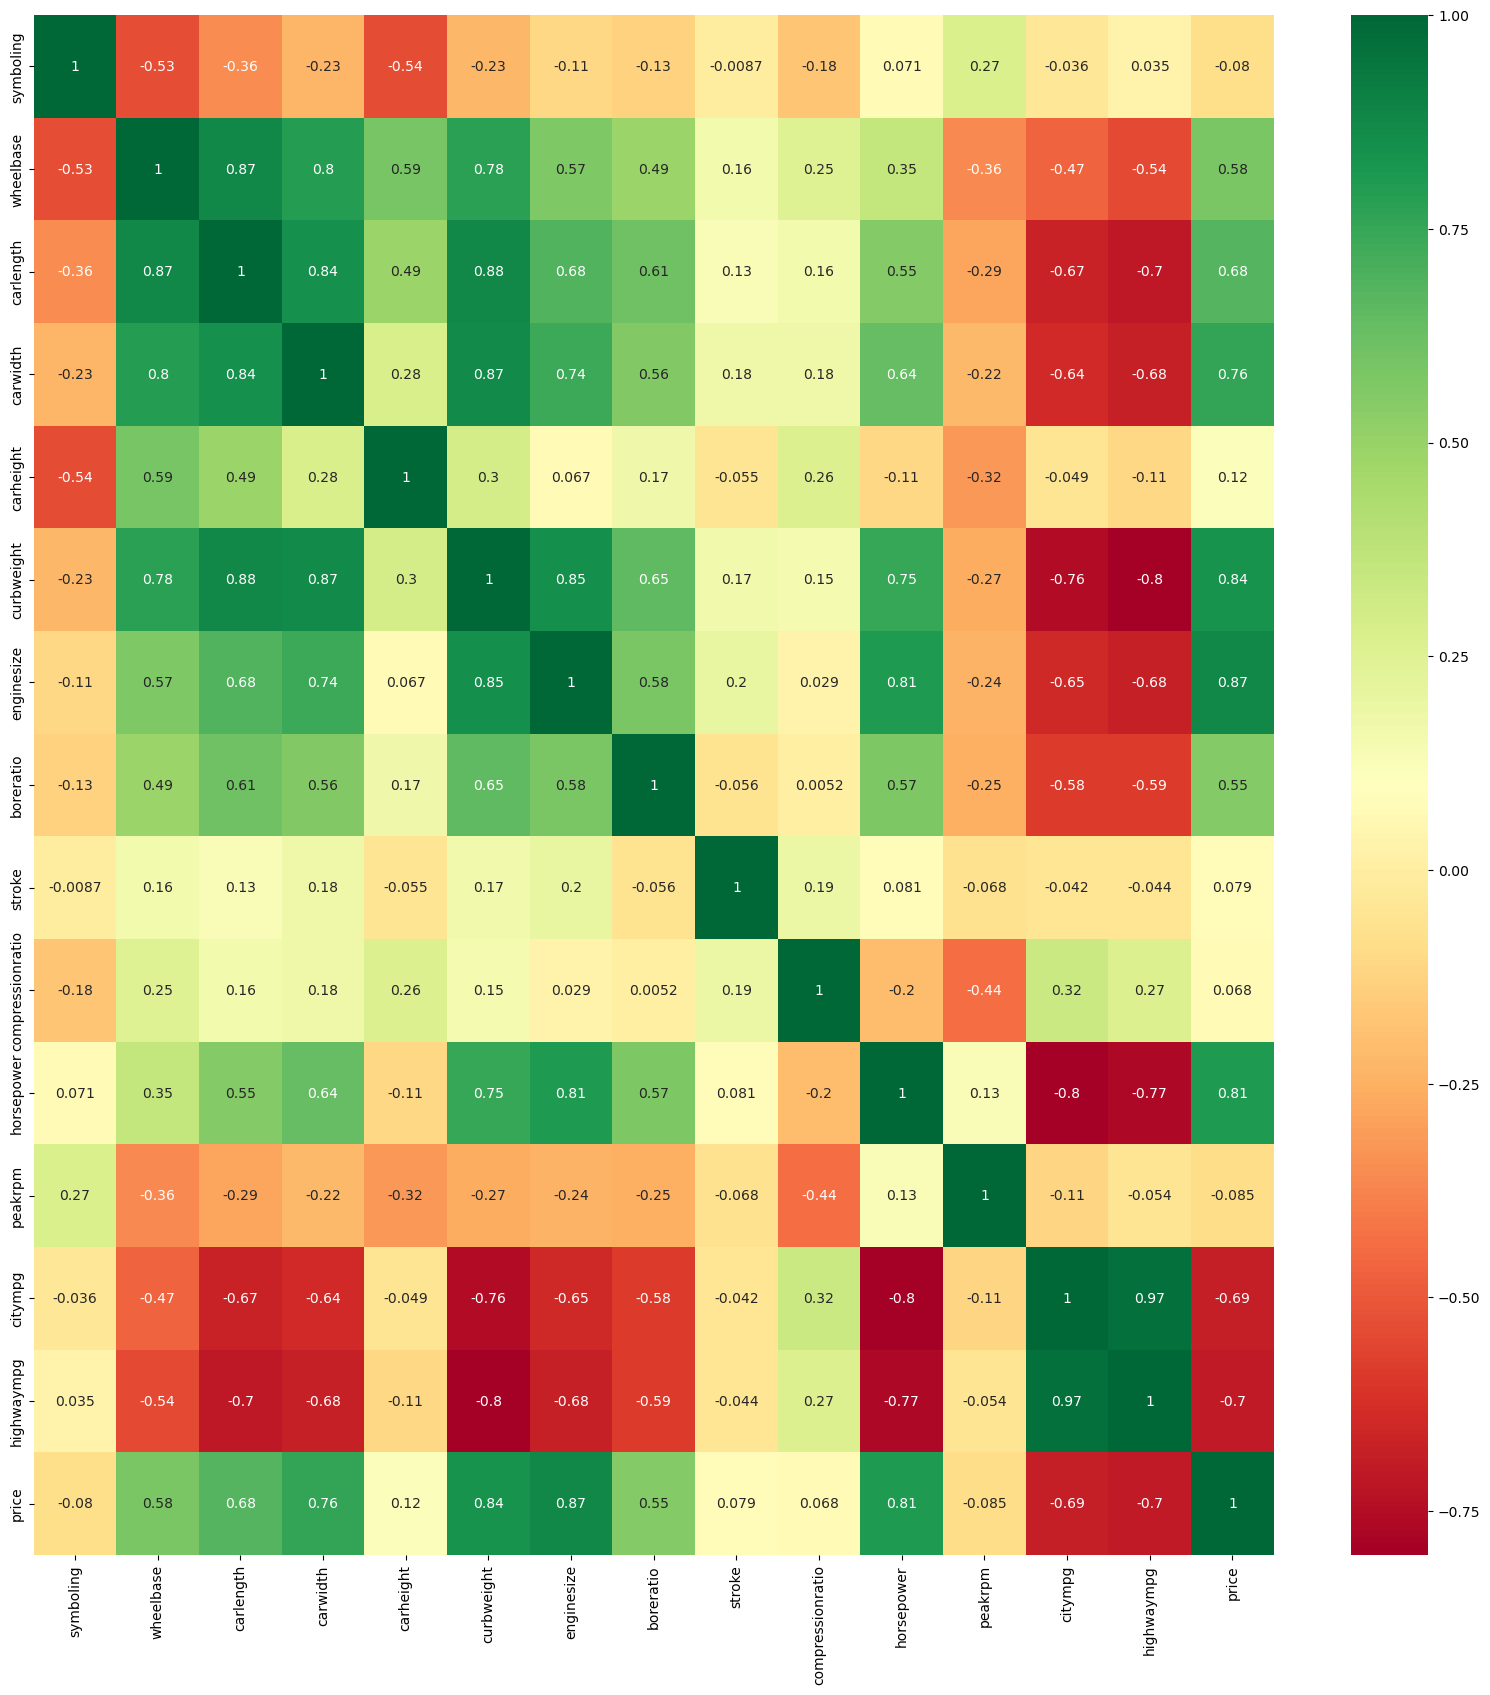

In [62]:
top_corr_feature=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(cars[top_corr_feature].corr(), annot=True,cmap="RdYlGn")

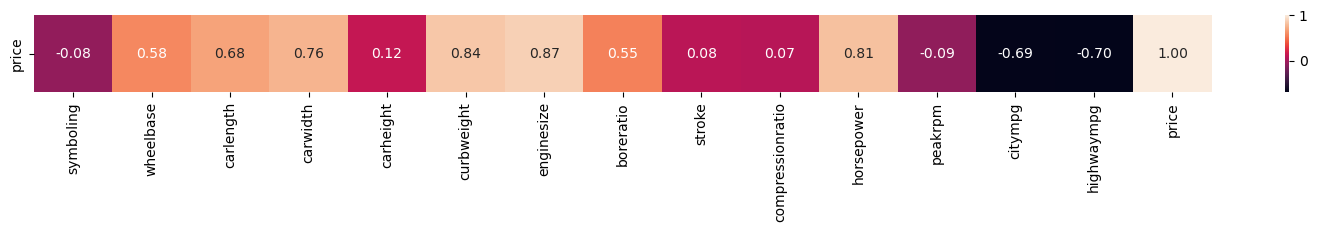

In [63]:
num = cars.select_dtypes(exclude = 'object')
numcorr = cars.corr()
f, ax = plt.subplots(figsize = (19,1)) # set figure size
sns.heatmap(numcorr.sort_values(by = 'price', ascending = False).head(1), annot = True, fmt = ".2f")
plt.show()

In [111]:
cars.dtypes.value_counts()

int64       9
object      9
float64     7
int32       1
category    1
dtype: int64

In [112]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   symboling           205 non-null    int64   
 1   CarName             205 non-null    object  
 2   CompanyName         205 non-null    object  
 3   fueltype            205 non-null    object  
 4   aspiration          205 non-null    object  
 5   carbody             205 non-null    object  
 6   drivewheel          205 non-null    object  
 7   enginelocation      205 non-null    object  
 8   wheelbase           205 non-null    float64 
 9   carlength           205 non-null    float64 
 10  carwidth            205 non-null    float64 
 11  carheight           205 non-null    float64 
 12  curbweight          205 non-null    int64   
 13  enginetype          205 non-null    object  
 14  enginesize          205 non-null    int64   
 15  fuelsystem          205 non-null    obje

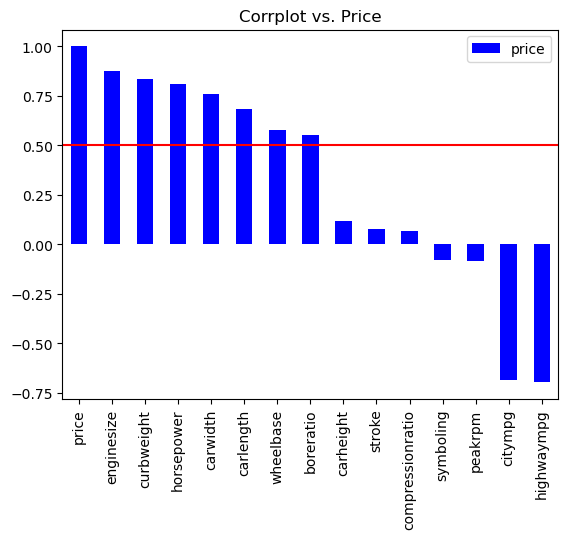

In [64]:
numcorr['price'].sort_values(ascending = False).to_frame().plot.bar(color = 'blue')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.title('Corrplot vs. Price')
plt.show()

In [65]:
cars.to_excel("cars_cleaned.xlsx",sheet_name='Cleaned')

# <center> <font color = magenta> Feature Engineering

In [66]:
cars.head()

,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsrange_binned
0,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium
1,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium
2,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium
3,2,audi 100ls,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium
4,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium


In [67]:
list5 = []
for index,row in cars.iterrows():
    if len(row.doornumber) > 1:
        list5.append(w2n.word_to_num(row.doornumber))
    else:
        list5.append('4')

In [68]:
cars['doornumber_int'] = pd.Series(list5)


In [69]:
cars['doornumber_int'].unique()


array([2, 4], dtype=int64)

In [70]:
cars.drop(['doornumber'],axis=1,inplace=True)


In [71]:
list6 = []
for index,row in cars.iterrows():
    if len(row.cylindernumber) > 1:
        list6.append(w2n.word_to_num(row.cylindernumber))
    else:
        list6.append('4')

In [72]:
cars['cylindernumber_int'] = pd.Series(list6)


In [73]:
cars['cylindernumber_int'].unique()


array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [74]:
cars.drop(['cylindernumber'],axis=1,inplace=True)


In [75]:
cars.head()

,symboling,CarName,CompanyName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsrange_binned,doornumber_int,cylindernumber_int
0,3,alfa-romero giulia,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium,2,4
1,3,alfa-romero stelvio,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium,2,4
2,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium,2,6
3,2,audi 100ls,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium,4,4
4,2,audi 100ls,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium,4,5


# <center> <font color = magenta> One Hot Encoding

<font color = blue> When creating the column for sale price bins, the entries were not typecast to a string. Remember to do this for the housing dataset. 

In [76]:
cars = cars.astype({'carsrange_binned' : 'object'})

In [77]:
cars_X = cars.copy()
cars_X.drop('price', axis = 1, inplace = True)
cars_y = cars['price']

In [78]:
# Verifying cars df is unaffected 

cars.head(1)


,symboling,CarName,CompanyName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsrange_binned,doornumber_int,cylindernumber_int
0,3,alfa-romero giulia,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium,2,4


In [79]:
# cars_X is still a dataframe. We can access the object datatype columns and their numbers from it. 
# Get that as a list and use the list to determine which columns need to be OHE. 

cars_X.select_dtypes(include='object').columns

Index(['CarName', 'CompanyName', 'fueltype', 'aspiration', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem',
       'carsrange_binned'],
      dtype='object')

<font color = blue> Fetch the column names for object datatypes. Fetch the numbers of those columns. Save as list. Use that list for OHE after converting the independent variables to an array. 

In [80]:
cols_ohe = [cars_X.columns.get_loc(col) for col in cars_X.select_dtypes(include='object').columns]
cols_ohe
# type(cols_ohe)

[1, 2, 3, 4, 5, 6, 7, 13, 15, 23]

In [81]:
cars_x= cars_X.iloc[:,:].values


In [82]:
type(cars_x)


numpy.ndarray

In [83]:
# cars_y
cars_x

array([[3, 'alfa-romero giulia', 'alfa-romero', ..., 'Medium', 2, 4],
       [3, 'alfa-romero stelvio', 'alfa-romero', ..., 'Medium', 2, 4],
       [1, 'alfa-romero Quadrifoglio', 'alfa-romero', ..., 'Medium', 2,
        6],
       ...,
       [-1, 'volvo 244dl', 'volvo', ..., 'Highend', 4, 6],
       [-1, 'volvo 246', 'volvo', ..., 'Highend', 4, 6],
       [-1, 'volvo 264gl', 'volvo', ..., 'Highend', 4, 4]], dtype=object)

In [84]:
list(cars_x[1,:])


[3,
 'alfa-romero stelvio',
 'alfa-romero',
 'gas',
 'std',
 'convertible',
 'rwd',
 'front',
 88.6,
 168.8,
 64.1,
 48.8,
 2548,
 'dohc',
 130,
 'mpfi',
 3.47,
 2.68,
 9.0,
 111,
 5000,
 21,
 27,
 'Medium',
 2,
 4]

In [85]:
list(cars_x[1,cols_ohe])


['alfa-romero stelvio',
 'alfa-romero',
 'gas',
 'std',
 'convertible',
 'rwd',
 'front',
 'dohc',
 'mpfi',
 'Medium']

In [86]:
for num in tqdm(cols_ohe):
    dummy_ = pd.get_dummies(cars_x[:,num],sparse=True)
    if(num!=1):
        dummy = np.concatenate((dummy,dummy_),axis=1)
    else:
        dummy = dummy_
        

100%|██████████| 10/10 [00:00<00:00, 46.50it/s]


In [87]:
dummy

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [88]:
dummy.shape

(205, 194)

In [89]:
object_cols = cars_X.select_dtypes(include='object')
n = 0

for col in object_cols.columns:
    n = n + cars[col].nunique()
    
n    

194

<font color = blue> This is how we know that for each of the 205 entries or rows of the cars df, a total of 194 OHE values are generated (as seen in the shape of the dummy array). This number 194 corresponds to the total number of unique entries of all categorical values. 

In [90]:
list(cars_x[1,:])


[3,
 'alfa-romero stelvio',
 'alfa-romero',
 'gas',
 'std',
 'convertible',
 'rwd',
 'front',
 88.6,
 168.8,
 64.1,
 48.8,
 2548,
 'dohc',
 130,
 'mpfi',
 3.47,
 2.68,
 9.0,
 111,
 5000,
 21,
 27,
 'Medium',
 2,
 4]

In [91]:
cars_x = np.delete(cars_x,cols_ohe,1)


In [92]:
list(cars_x[1,:])

[3,
 88.6,
 168.8,
 64.1,
 48.8,
 2548,
 130,
 3.47,
 2.68,
 9.0,
 111,
 5000,
 21,
 27,
 2,
 4]

In [93]:
cars_x = np.concatenate((cars_x,dummy),axis=1)


In [94]:
cars_x.shape

(205, 210)

In [95]:
list(cars_x[1,:])


[3,
 88.6,
 168.8,
 64.1,
 48.8,
 2548,
 130,
 3.47,
 2.68,
 9.0,
 111,
 5000,
 21,
 27,
 2,
 4,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1]

## <center> <font color = magenta> Data Splitting

In [96]:
np.random.seed(0)

number_of_samples = len(cars_x)

random_indices = np.random.permutation(number_of_samples)

num_training_samples = int(number_of_samples*0.75)

cars_x_train = cars_x[random_indices[:num_training_samples]]
cars_y_train=cars_y[random_indices[:num_training_samples]]

cars_x_validation=cars_x[random_indices[num_training_samples:]]
cars_y_validation=cars_y[random_indices[num_training_samples:]]

In [97]:
print(f'x train = {len(cars_x_train)}')
print(f'y train = {len(cars_y_train)}')
print(f'x val = {len(cars_x_validation)}')
print(f'y val = {len(cars_y_validation)}')

x train = 153
y train = 153
x val = 52
y val = 52


## <center> <font color = magenta> Standard Scaling

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(cars_x_train)

# Apply transform to both the training set and the test set.
cars_x_train = scaler.transform(cars_x_train)
cars_x_validation = scaler.transform(cars_x_validation)

In [99]:
cars_x_train.shape


(153, 210)

In [100]:
cars_x_validation.shape


(52, 210)

## <center> <font color = magenta> Principal Component Analysis

In [101]:
from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.95)

pca.fit(cars_x_train)

cars_x_train = pca.transform(cars_x_train)
cars_x_validation = pca.transform(cars_x_validation)

In [102]:
print(f'x train  = {cars_x_train.shape}')
print(f'x val  = {cars_x_validation.shape}')

x train  = (153, 107)
x val  = (52, 107)


## <center> <font color = magenta> Linear Regression

In [103]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(cars_x_train, cars_y_train)   # Fitting step - develops the equation b/n dep and indep vars

# Predicts on the training dataset. Compares to the y values to check accuracy
cars_linear_train_predicted = model.predict(cars_x_train) 

# Predicts for the validation. The model was not fit on this. It uses the model from the training data and fits to the validation. 
# The y values for val will be used to compare prediction accuracy. 

cars_linear_validation_predicted = model.predict(cars_x_validation)


In [104]:
from sklearn.metrics import r2_score,mean_squared_error


# R2 tells how well the variability is being captured by the model 
r2_score(cars_y_train, cars_linear_train_predicted)

0.9893930164933828

In [113]:
r2_score(cars_y_validation, cars_linear_validation_predicted)


0.9052448446435073

Training data - Mean squared error: 632001.64
Validation data - Mean squared error: 7038407.04
Training data Coefficient of determination: 0.99
Validation data Coefficient of determination: 0.91


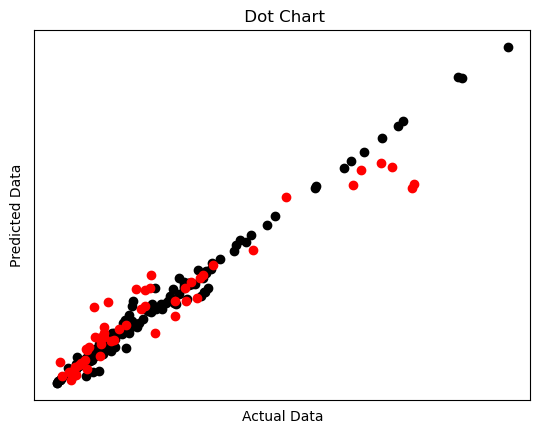

In [106]:
# The coefficients
# print("Coefficients: \n", model.coef_, "\n")

# The mean squared error
print("Training data - Mean squared error: %.2f" % mean_squared_error(cars_y_train, cars_linear_train_predicted))
print("Validation data - Mean squared error: %.2f" % mean_squared_error(cars_y_validation, cars_linear_validation_predicted))

# The coefficient of determination: 1 is perfect prediction
print("Training data Coefficient of determination: %.2f" % r2_score(cars_y_train, cars_linear_train_predicted))
print("Validation data Coefficient of determination: %.2f" % r2_score(cars_y_validation, cars_linear_validation_predicted))

# Plot outputs
plt.scatter(cars_y_train, cars_linear_train_predicted, color="black")
plt.scatter(cars_y_validation, cars_linear_validation_predicted, color="red")
plt.xticks(())
plt.yticks(())
plt.title(" Dot Chart")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")

plt.show()